# Source Node
0 -> 1

Documentation: http://geopandas.org/io.html

In [1]:
# PARAMETERS
# Gebruik altijd raw strings (r''). Backslash (\) is namelijk de Python escape character.
folder = r'/home/ab/Documents/Open-data/shapefiles/shp-woonplaats'
filename = r'woonplaats-grenzen.shp'

# SOURCE NODE
from os.path import join
import geopandas as gpd
from header import gdf_to_df

# Read the file
print('Reading file:', join(folder, filename))
gdf = gpd.read_file( join(folder, filename) )

# Reproject to coordinate reference system WGS84 (long/lat)
# This HAS to be done here, because we'll lose the CRS when proceeding to the next node
# WGS84 is the official standard for GeoJSON: https://tools.ietf.org/html/rfc7946#section-4
wgs84 = {'init': 'epsg:4326'}
if gdf.crs != wgs84:
    # If there is no CRS in the shapefile reprojecting is not possible
    try:
        print('Reprojecting to WGS84...')
        gdf = gdf.to_crs(wgs84)
    except:
        print('Unable to set WGS84 projection. No initial CRS found in shapefile. Please verify the coordinates manually.')

# Output
output_table = gdf_to_df(gdf)

Reading file: /home/ab/Documents/Open-data/shapefiles/shp-woonplaats/woonplaats-grenzen.shp
Reprojecting to WGS84...


## Develop
Below is for development purposes only. Writing to and reading from a CSV file enables me to mimic `input_table` and `output_table` in KNIME.

,id,identifica,gemcode,gemnaam,status,naam,begindatum,einddatumt,inonderzoe,documentnu,documentda,indicatie_,aanduiding,aanduidi_1,key,mutatiedat,wkt
0,0,1000,0873,Woensdrecht,Woonplaats aangewezen,Hoogerheide,2010-04-06,None,N,2010WP00000000000569,2010-04-06,N,N,0,1000_2010040600000200_N_0,2016-11-07,"POLYGON ((4.294093600964323 51.44580001257756,..."
1,1,1001,0873,Woensdrecht,Woonplaats aangewezen,Huijbergen,2010-04-06,None,N,2010WP00000000000569,2010-04-06,N,N,0,1001_2010040600000200_N_0,2016-11-07,"POLYGON ((4.383001797004704 51.45113602676265,..."
2,15,1014,0342,Soest,Woonplaats aangewezen,Soesterberg,2007-01-16,None,N,AZ/2007/224,2007-01-16,N,N,0,1014_2007011600000000_N_0,2016-11-07,"POLYGON ((5.299532593239276 52.12678758464234,..."
3,16,1015,0622,Vlaardingen,Woonplaats aangewezen,Vlaardingen,2007-01-30,None,N,VLD/2007/5652,2007-01-30,N,N,0,1015_2007013000000000_N_0,2016-11-07,"POLYGON ((4.270520295054724 51.90799391589663,..."
4,2,1002,0873,Woensdrecht,Woonplaats aangewezen,Ossendrecht,2010-04-06,None,N,2010WP00000000000569,2010-04-06,N,N,0,1002_2010040600000200_N_0,2016-11-07,"POLYGON ((4.355214239079816 51.37649369129296,..."


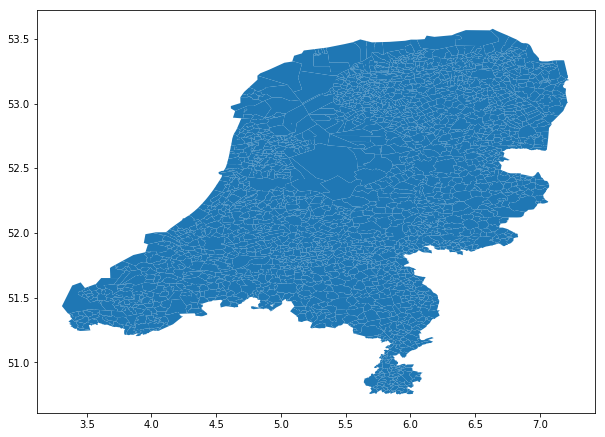

In [2]:
# Write to input/output table
output_table.to_csv('io_table.csv', index=False)

# Show please
display(output_table.head())
%matplotlib inline
gdf.plot(figsize = (10, 10));

Q: Is CRS really lost when converted to DF?

A: Yes I think so. Even when converted to GeoJSON. See the link in the source code above.

In [ ]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot()

In [ ]:
gdf.crs

In [ ]:
gdf.to_crs(epsg=4326)